# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [47]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [48]:
data = pd.read_csv('weight-height.csv')

female = data.loc[data['Gender']=='Female']
male = data.loc[data['Gender']=='Male']

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007
print(female['Height'].mean())
print(male['Height'].mean())
print(female['Weight'].mean())
print(male['Weight'].mean())

print(female['Height'].std())
print(male['Height'].std())
print(female['Weight'].std())
print(male['Weight'].std())


63.708773603424916
69.02634590621737
135.8600930074687
187.0206206581929
2.696284015765056
2.8633622286606517
19.022467805319007
19.781154516763813


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


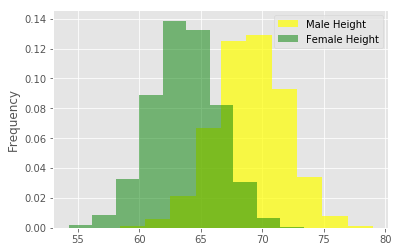

In [49]:
male['Height'].plot.hist(bins=10,normed = True,alpha=0.7,label='Male Height', color = 'yellow')
female['Height'].plot.hist(bins=10,normed = True,alpha=0.5,label='Female Height', color = 'green')
plt.legend()

In [50]:
# male population is higher than female population.
# female population has a higher frequency around the mean that male freqeucny around the mean + the height of the male
#population is more widely distributes -> higher STD
# normal distribution



#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


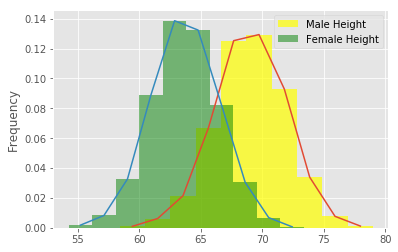

In [55]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy
# plot the calculated curve


male['Height'].plot.hist(bins=10,normed = True,alpha=0.7,label='Male Height', color = 'yellow')
female['Height'].plot.hist(bins=10,normed = True,alpha=0.5,label='Female Height', color = 'green')
plt.legend()
x,y=density(male.Height)
plt.plot(x,y)
x,y=density(female.Height)
plt.plot(x,y)




# Generate test data and test the function - uncomment to run the test
#np.random.seed(5)
#mu, sigma = 0, 0.1 # mean and standard deviation
#s = np.random.normal(mu, sigma, 100)
#x,y = density(s)
#plt.plot(x,y, label = 'test')
#plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

In [ ]:
# as above

#### Repeat above exerice for male and female weights

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


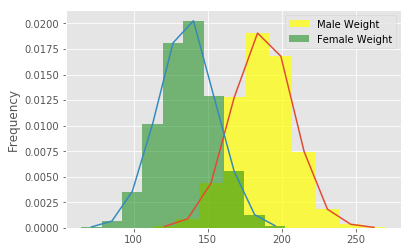

In [56]:
male['Weight'].plot.hist(bins=10,normed = True,alpha=0.7,label='Male Weight', color = 'yellow')
female['Weight'].plot.hist(bins=10,normed = True,alpha=0.5,label='Female Weight', color = 'green')
plt.legend()
x,y=density(male.Weight)
plt.plot(x,y)
x,y=density(female.Weight)
plt.plot(x,y)


#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?
# similar distributions as height
#both have normal distributions
# 

# So whats the takeaway when comparing male and female heights and weights 
# there is a more visible diffence between weight compared to height when comparing sexes


#### Repeat Above experiments in seaborn and compare with your results. 

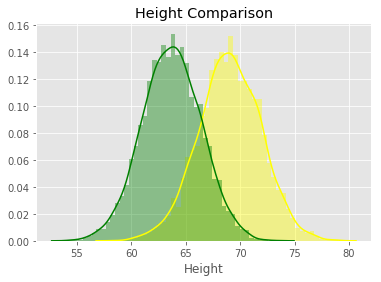

In [66]:
import seaborn as sns
sns.distplot(male.Height, color='yellow')
sns.distplot(female.Height, color='green')
plt.title('Height Comparison')

plt.show()

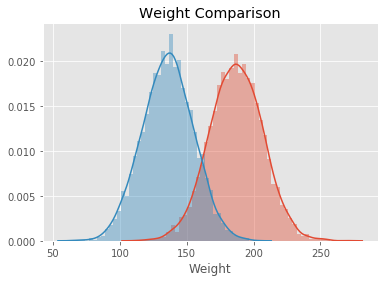

In [61]:
sns.distplot(male.Weight)
sns.distplot(female.Weight)
plt.title('Weight Comparison')

plt.show()

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

#seaborn provides a faster way to display the histograms and density functions

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.